In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rc("figure", figsize=(16, 9))

In [7]:
dataframe = pd.read_csv("data.csv", sep=';')
dataframe.head()

id  diagnostic  radius  texture  perimeter    area  smoothness  \
0    842302           1   17.99    10.38     122.80  1001.0     0.11840   
1    842517           1   20.57    17.77     132.90  1326.0     0.08474   
2  84300903           1   19.69    21.25     130.00  1203.0     0.10960   
3  84348301           1   11.42    20.38      77.58   386.1     0.14250   
4  84358402           1   20.29    14.34     135.10  1297.0     0.10030   

   compactness  concavity  concave_points  symmetry  fractal_dimension  
0      0.27760     0.3001         0.14710    0.2419            0.07871  
1      0.07864     0.0869         0.07017    0.1812            0.05667  
2      0.15990     0.1974         0.12790    0.2069            0.05999  
3      0.28390     0.2414         0.10520    0.2597            0.09744  
4      0.13280     0.1980         0.10430    0.1809            0.05883

In [8]:
dataframe = dataframe.drop(['id'],1)
dataframe.describe()

diagnostic      radius     texture   perimeter         area  \
count  569.000000  569.000000  569.000000  569.000000   569.000000   
mean     0.372583   14.127292   19.289649   91.969033   654.889104   
std      0.483918    3.524049    4.301036   24.298981   351.914129   
min      0.000000    6.981000    9.710000   43.790000   143.500000   
25%      0.000000   11.700000   16.170000   75.170000   420.300000   
50%      0.000000   13.370000   18.840000   86.240000   551.100000   
75%      1.000000   15.780000   21.800000  104.100000   782.700000   
max      1.000000   28.110000   39.280000  188.500000  2501.000000   

       smoothness  compactness   concavity  concave_points    symmetry  \
count  569.000000   569.000000  569.000000      569.000000  569.000000   
mean     0.096360     0.104341    0.088799        0.048919    0.181162   
std      0.014064     0.052813    0.079720        0.038803    0.027414   
min      0.052630     0.019380    0.000000        0.000000    0.106000   
25%      0.086370     0.064920    0.029560        0.020310    0.161900   
50%      0.095870     0.092630    0.061540        0.033500    0.179200   
75%      0.105300     0.130400    0.130700        0.074000    0.195700   
max      0.163400     0.345400    0.426800        0.201200    0.304000   

       fractal_dimension  
count         569.000000  
mean            0.062798  
std             0.007060  
min             0.049960  
25%             0.057700  
50%             0.061540  
75%             0.066120  
max             0.097440

In [9]:
print(dataframe.groupby('diagnostic').size()) # B: 0, M: 1

diagnostic
0    357
1    212
dtype: int64


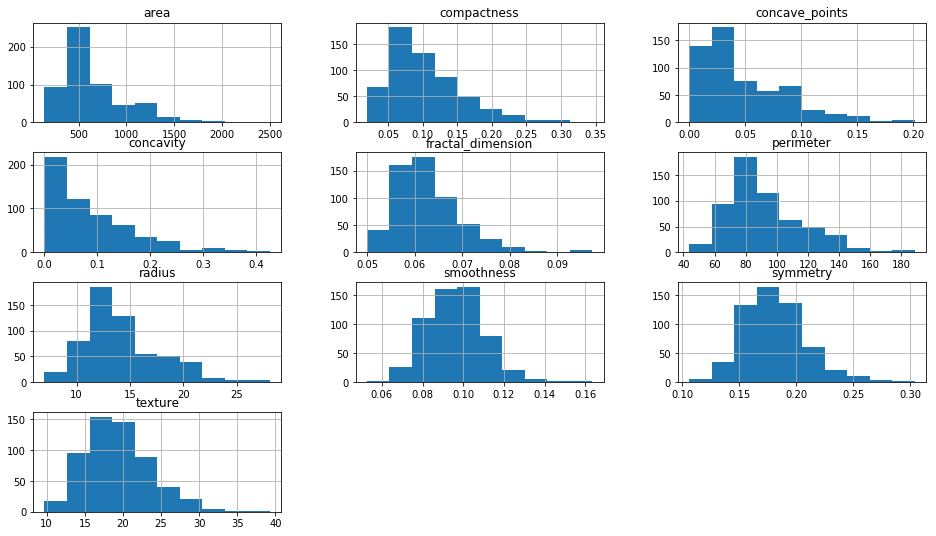

In [10]:
dataframe.drop(['diagnostic'],1).hist()
plt.show()

In [22]:
sb.pairplot(dataframe.dropna(), hue='diagnostic',size=10,vars=["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"], kind='reg')

In [11]:
X = np.array(dataframe.drop(['diagnostic'],1))
y = np.array(dataframe['diagnostic'])
X.shape

(569, 10)

In [12]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
model.score(X,y)

0.9086115992970123

In [15]:
import statsmodels.api as sm

In [16]:
res1 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.128707
         Iterations 11


In [18]:
print(res1.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      559
Method:                           MLE   Df Model:                            9
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                  0.8051
Time:                        19:40:19   Log-Likelihood:                -73.234
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                1.794e-124
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.9479      3.379     -0.873      0.383      -9.570       3.674
x2             0.3777      0.063      5.977      0.000       0.254       0.502
x3            -0.0457      0.501     -0.091      0.9